In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Criação de interface com usuário para upload de arquivo csv.

In [2]:
df = pd.read_csv ('D:/Documentos/Estudo Dirigido/Dados2.csv',sep=';',index_col='Amostra',decimal= ',')

ModuleNotFoundError: No module named 'google'

Leitura do Arquivo csv, definição de ";" como separador, definição da coluna "Amostra" como index e definição de "," como separador decimal.

In [3]:
df = pd.read_csv(io.StringIO(uploaded[list(uploaded.keys())[0]].decode('utf-8')),sep=';',index_col='Amostra',decimal= ',')
df.head()

NameError: name 'uploaded' is not defined

Criação de dataframe "df_dados" para facilitar a escrita e compreensão.

In [0]:
df_dados = df[['Obs1','Obs2','Obs3','Obs4','Obs5','Obs6']]

Criação da coluna "Media" com a média de cada linha.

In [0]:
df['Media'] = df_dados.mean(axis=1)

Criação da coluna "Amplitude" com a diferença do máximo e mínimo de cada linha.

In [0]:
df['Amplitude'] = df_dados.max(axis=1) - df_dados.min(axis=1)

Criação da coluna "Desvio Padrao" com o desvio padrão de cada linha.

In [0]:
df['Desvio Padrao'] = df_dados.std(axis=1)

In [8]:
df.head()

,Obs1,Obs2,Obs3,Obs4,Obs5,Obs6,Media,Amplitude,Desvio Padrao
Amostra,,,,,,,,,
1,50.24,47.83,49.92,49.86,50.69,51.37,49.985000,3.54,1.195337
2,49.40,49.42,48.33,51.35,51.65,50.23,50.063333,3.32,1.269577
3,49.70,50.19,51.81,48.95,50.79,48.37,49.968333,3.44,1.247372
4,51.49,49.21,49.37,51.60,51.48,48.16,50.218333,3.44,1.489368
5,48.15,50.89,49.19,51.09,49.04,47.79,49.358333,3.30,1.370699


Cálculo da média das médias.

In [9]:
med_media = df['Media'].mean(axis = 0)
med_media

50.02673333333334

Cálculo da média dos desvios.

In [10]:
med_desvio = df['Desvio Padrao'].mean(axis = 0)
med_desvio

1.2470908060726076

Cálculo da linha superior e inferior de controle.

In [0]:
LSC = med_media + 3 * med_desvio
LIC = med_media - 3 * med_desvio

Criação do gráfico de controle de médias.

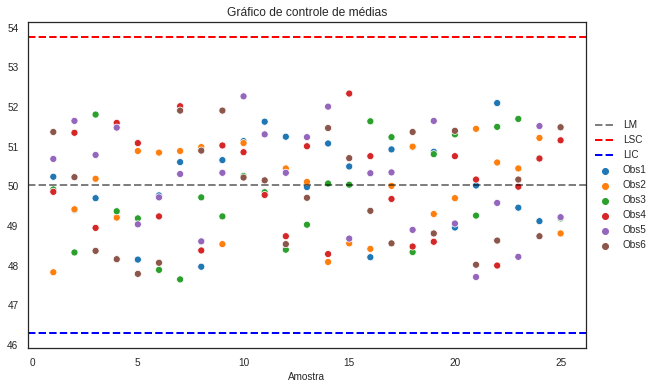

In [21]:
# Definição do tamanho da figura e seu título
plt.figure(figsize = (10,6))
plt.title('Gráfico de controle de médias')

# Plota os dados e linhas de controle
sns.scatterplot(data = df_dados, markers = ['o']*df_dados.shape[1], s = 50)
plt.axhline(med_media, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM',alpha = 0.5)
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'b', linestyle = 'dashed', linewidth = 2,label = 'LIC')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

